In [1]:
#practrising RNN and LSTM for google stock prediction using lstm

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import tensorflow as tf

In [5]:
np

<module 'numpy' from '/opt/anaconda3/lib/python3.8/site-packages/numpy/__init__.py'>

In [6]:
pd

<module 'pandas' from '/opt/anaconda3/lib/python3.8/site-packages/pandas/__init__.py'>

In [7]:
plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [8]:
tf

<module 'tensorflow' from '/opt/anaconda3/lib/python3.8/site-packages/tensorflow/__init__.py'>

In [9]:
datasetTrain = pd.read_csv("Google_Stock_Price_Train.csv")

In [10]:
datasetTrain

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [11]:
trainingSet = datasetTrain[["Open"]]

In [12]:
trainingSet

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
trainingSetScaler = scaler.fit_transform(trainingSet)

In [16]:
trainingSetScaler.shape

(1258, 1)

In [17]:
X_train = []
y_train = []


for i in range(60,1258):
    X_train.append(trainingSetScaler[i-60:i,0])
    y_train.append(trainingSetScaler[i,0])

In [18]:
type(X_train)

list

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [20]:
#now we are adding dimension to the dataframe 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [21]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [29]:
X_train.shape

(1198, 60, 1)

In [23]:
tf

<module 'tensorflow' from '/opt/anaconda3/lib/python3.8/site-packages/tensorflow/__init__.py'>

In [25]:
from keras.models import Sequential

In [26]:
Sequential()

In [27]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [28]:
regressor = Sequential()

In [31]:
#now we do regularization to prevent the model from ovefitting
#3 aurg in the LSTM
#1 : units : number of cells in the LSTM
#2 : return seq : true bcoz we are buidling the stack LSTM and so there will be more LSTM layers to it, return should be True
#.  : while the Last LSTM layer does not have the LSTM after it so there the return seq is false.
#3 : input shape (3D)
#but here we will give only last 2 argument i.e timestamps and inidcator (predictor) dimension added.



regressor.add(LSTM(units = 50, return_sequences = True , input_shape = (X_train.shape[1],1)))

In [32]:
#now we will dropout regulariation for overfitting
# here 0.2 means 20% of the neaourn will be  consider while doing the forward propagation and backword propagation.

regressor.add(Dropout(0.2))

In [34]:
#now adding 2nd LSTM layers and in 2nd we dont need to provide the input_shape
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [36]:
# 3 layer
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))


In [38]:
# 4 layers
regressor.add(LSTM(units = 50 , return_sequences = False))
regressor.add(Dropout(0.2))

In [39]:
regressor.add(Dense(units =1))

In [45]:
#RMSprop : best situation for RNN
#adam : very powerful and relevant changes


regressor.compile(optimizer = "adam", loss = "mean_squared_error")

In [46]:
#connection of regressor to dataset

regressor.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0292
Epoch 2/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0044
Epoch 13/100


38/38 [==============================] - 6s 145ms/step - loss: 0.0013
Epoch 100/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0014


In [47]:
datasetTest = pd.read_csv("Google_Stock_Price_Test.csv")

In [48]:
real_stock_price = datasetTest.iloc[:,1:2].values

In [49]:
datasetTest.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [50]:
datasetTest

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [52]:
#here we will concate the dataset to find the input value
datasetTotal = pd.concat((datasetTrain["Open"], datasetTrain["Open"]),axis = 0)

In [53]:
inputs = datasetTotal[len(datasetTotal) - len(datasetTest)- 60 : ].values

In [54]:
#now here as we have not use the iloc method so the inputs is not in the numpy format

type(inputs)

numpy.ndarray

In [55]:
inputs = inputs.reshape(-1,1)

In [56]:
inputs

array([[778.59],
       [770.1 ],
       [755.13],
       [764.48],
       [759.61],
       [762.89],
       [769.75],
       [772.42],
       [769.  ],
       [772.66],
       [780.  ],
       [786.59],
       [782.74],
       [775.5 ],
       [777.85],
       [781.44],
       [776.33],
       [774.25],
       [776.03],
       [779.31],
       [779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07

In [58]:
len(inputs)

80

In [59]:
inputs = scaler.transform(inputs)

In [64]:
X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)

In [65]:
#now we are adding dimension to the dataframe 
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [67]:
predictedStockPrice = regressor.predict(X_test)

In [69]:
predictedStockPrice = scaler.inverse_transform(predictedStockPrice)

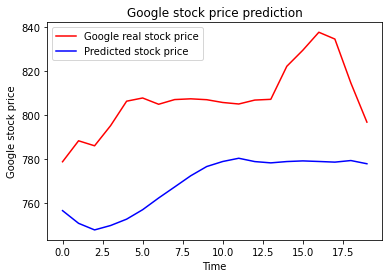

In [71]:
plt.plot(real_stock_price, color = "red", label = "Google real stock price")
plt.plot(predictedStockPrice, color = "blue" , label = "Predicted stock price")
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()